 
# <font color="navy"> **Assignment 2 : Predicting customer purchase amount.**



## Group-123 : Authors
-------

- **Snigdha Tarua - 2019ab04171**
- **Sanka Mahesh Sai - 2019ab04135**
- **Aravapalli Chandra Sekhar Gupta - 2019ab04187**



## <font color="firebrick"> Problem Statement

<hr>

Predicting Customer Purchases. Analyze the data set and identify the most relevant factors that influence customer purchase behavior. Build a model that predicts the purchase amount of customer against various products so that the company can tailor their services and provide offers for customers towards different products.



## List of objectives to be covered:

<hr>

1.	Write a Data Science Proposal for achieving the objective mentioned.
2.	Perform exploratory analysis on the data and describe your understanding of the data.
3.	Perform data wrangling / pre-processing (Module 8).
    a.	E.g., missing data, normalization, discretization, etc.
4.	Apply any two feature selection engineering techniques (Module 8)
5.	Compare the two selected feature engineering techniques.
6.	Plot top 5, 6, and 8 features.
7.	Provide a high-level description of Machine Learning models – Linear regression and Decision tree to predict.
8.	Compare the performance of the two classifiers – Linear regression and Decision tree to predict.
9.	Present the conclusions/results in the format shared.



In [1]:
import pandas as pd
import numpy as np

# loading the dataset
data = pd.read_csv("CustPurchTrain.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## <font color="firebrick">1. Performing exploratory analysis on the data

In [2]:
# converting column names to lower case.
data.columns = [x.lower() for x in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
user_id                       550068 non-null int64
product_id                    550068 non-null object
gender                        550068 non-null object
age                           550068 non-null object
occupation                    550068 non-null int64
city_category                 550068 non-null object
stay_in_current_city_years    550068 non-null object
marital_status                550068 non-null int64
product_category_1            550068 non-null int64
product_category_2            376430 non-null float64
product_category_3            166821 non-null float64
purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [3]:
# let's understand briefly about data distribution.
# removing scientific notation to understand the data better.
pd.options.display.float_format = "{:.2f}".format
data.describe()

,user_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase
count,550068.00,550068.00,550068.00,550068.00,376430.00,166821.00,550068.00
mean,1003028.84,8.08,0.41,5.40,9.84,12.67,9263.97
std,1727.59,6.52,0.49,3.94,5.09,4.13,5023.07
min,1000001.00,0.00,0.00,1.00,2.00,3.00,12.00
25%,1001516.00,2.00,0.00,1.00,5.00,9.00,5823.00
50%,1003077.00,7.00,0.00,5.00,9.00,14.00,8047.00
75%,1004478.00,14.00,1.00,8.00,15.00,16.00,12054.00
max,1006040.00,20.00,1.00,20.00,18.00,18.00,23961.00


In [4]:
data.describe(include="object")

,product_id,gender,age,city_category,stay_in_current_city_years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [5]:
print("Null value counts across all columns")
display(data.isnull().sum())
print("----------------------------------------")
print("Null value percentage across all columns")
display(data.isnull().mean())

Null value counts across all columns


user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            173638
product_category_3            383247
purchase                           0
dtype: int64

----------------------------------------
Null value percentage across all columns


user_id                      0.00
product_id                   0.00
gender                       0.00
age                          0.00
occupation                   0.00
city_category                0.00
stay_in_current_city_years   0.00
marital_status               0.00
product_category_1           0.00
product_category_2           0.32
product_category_3           0.70
purchase                     0.00
dtype: float64

#### <font color="green">Observations:

* We have found that 32 % of product_category_2 and 70% of product_category_1 is missing.
* As product categories are masked and corresponding values doesn't indicate anything clearly -- we can't take the decision of how to fill them now.

### Distribution of target variable

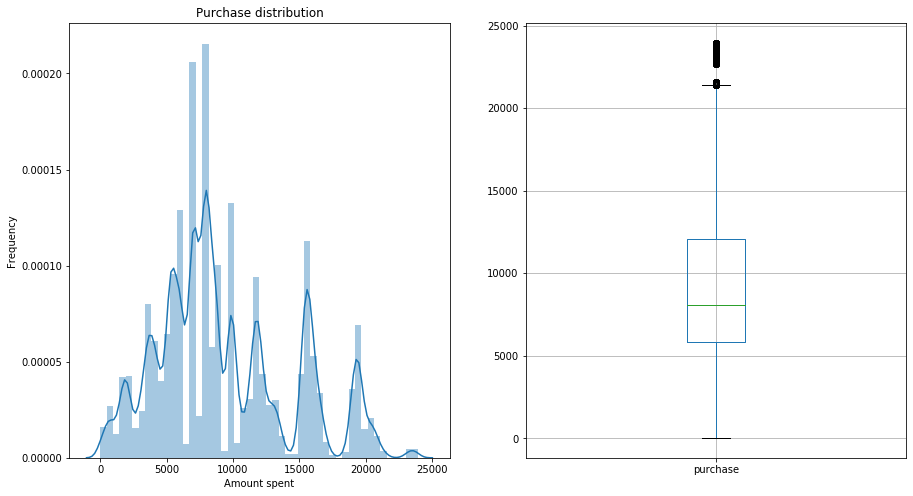

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))

plt.subplot(121)
sns.distplot(data["purchase"])
plt.title("Purchase distribution")
plt.xlabel("Amount spent")
plt.ylabel("Frequency")

plt.subplot(122)
data.boxplot(column=["purchase"])

plt.show()

### <font color="green">Observations:

* Our target variable spans from 0 - 25000.
* We can notice more than 50% of data is in the range of 5000 to 12000

###  Let's check the strength of correlation

(7.0, 0.0)

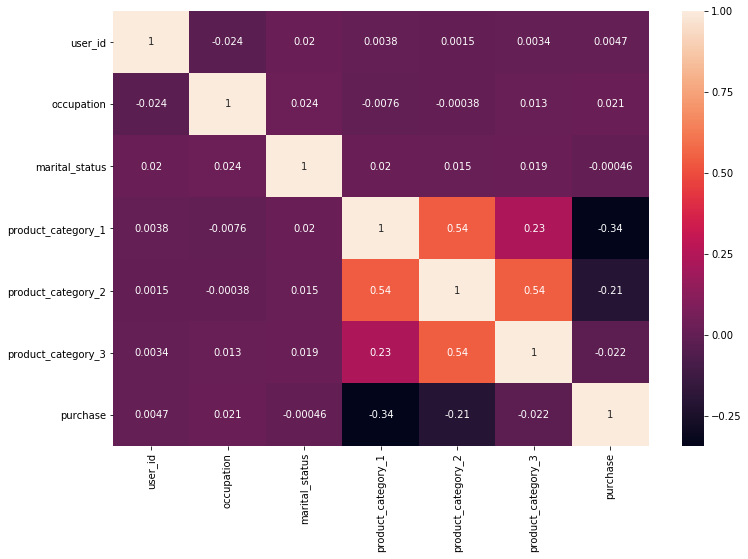

In [7]:
plt.figure(figsize=(12,8))
df_corr = data.corr()
ax = sns.heatmap(df_corr, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### <font color="green">Observations:

* We can observe the trend that only product category 1 and product category 2 are negatively correlated to purchase.
* All the other independent features are neither strongly correlated to each other or the target.
* This indicates that we don't have any strong liner relationship in the dataset.

### As we started to analyse dataset and target variable -- let's dig deeper to individual variable and understand about each feature.

In [8]:
# all the corresponding columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
user_id                       550068 non-null int64
product_id                    550068 non-null object
gender                        550068 non-null object
age                           550068 non-null object
occupation                    550068 non-null int64
city_category                 550068 non-null object
stay_in_current_city_years    550068 non-null object
marital_status                550068 non-null int64
product_category_1            550068 non-null int64
product_category_2            376430 non-null float64
product_category_3            166821 non-null float64
purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
# user_id can be disrete value and let's make it an object.
temp = data["user_id"].astype(str)
display(temp.describe())

count      550068
unique       5891
top       1001680
freq         1026
Name: user_id, dtype: object

In [10]:
temp = data["product_id"].astype(str)
display(temp.describe())

count        550068
unique         3631
top       P00265242
freq           1880
Name: product_id, dtype: object

### <font color="green">Observations:

* We can understand a important factor that we have only **5891 unique customers and only 3631 unique products**.
* An user purchased **1026 items**.(highest by any user)
* A particular product was bought by **1880 customers.** (higher than any other product)

In [11]:
def print_dist(col):
    print(col+" Distribution")
    print("-"*len(col+" Distribution"))
    count_dict = dict(data[col].value_counts())
    count_dict_percentage = dict(data[col].value_counts(normalize=True))

    print("Value\tCount\tPercentage")
    for key in count_dict:
        print(str(key)+"\t"+str(count_dict[key])+"\t"+str(count_dict_percentage[key].round(2)))

    sns.countplot(data[col]);

gender Distribution
-------------------
Value	Count	Percentage
M	414259	0.75
F	135809	0.25


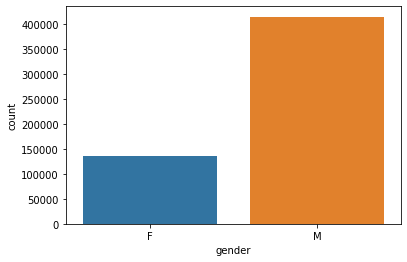

In [12]:
print_dist("gender")

### <font color="green">Observations:

* Men made highest number of purchases and around 75% of them.

age Distribution
----------------
Value	Count	Percentage
26-35	219587	0.4
36-45	110013	0.2
18-25	99660	0.18
46-50	45701	0.08
51-55	38501	0.07
55+	21504	0.04
0-17	15102	0.03


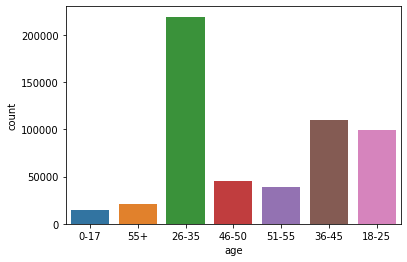

In [13]:
print_dist("age")

### <font color="green">Observations:

* This shows a good trend that **40% of purchases are made by people in 26-35 age group.**
* Kids from **0-17 years hardly shopped and account for only 0.03% of number of purchases.**

occupation Distribution
-----------------------
Value	Count	Percentage
4	72308	0.13
0	69638	0.13
7	59133	0.11
1	47426	0.09
17	40043	0.07
20	33562	0.06
12	31179	0.06
14	27309	0.05
2	26588	0.05
16	25371	0.05
6	20355	0.04
3	17650	0.03
10	12930	0.02
5	12177	0.02
15	12165	0.02
11	11586	0.02
19	8461	0.02
13	7728	0.01
18	6622	0.01
9	6291	0.01
8	1546	0.0


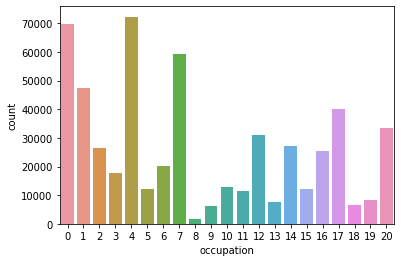

In [14]:
print_dist("occupation")

### <font color="green">Observations:

* We are not sure of mapping of numbers to occupations but we can understand that **occupation 4** made highest number of purchases and **occupation 8** made least number of purchases.

city_category Distribution
--------------------------
Value	Count	Percentage
B	231173	0.42
C	171175	0.31
A	147720	0.27


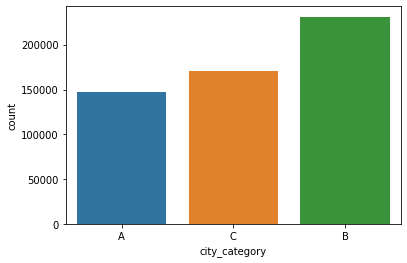

In [15]:
print_dist("city_category")

### <font color="green">Observations:

* People from **city category B** tend to shop more.

stay_in_current_city_years Distribution
---------------------------------------
Value	Count	Percentage
1	193821	0.35
2	101838	0.19
3	95285	0.17
4+	84726	0.15
0	74398	0.14


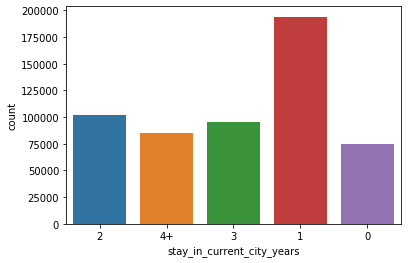

In [16]:
print_dist("stay_in_current_city_years")

### <font color="green">Observations:

* Most of the purchases are made by people who are relatively new to city.
* May be they have settled down and now purchasing the necessities.

marital_status Distribution
---------------------------
Value	Count	Percentage
0	324731	0.59
1	225337	0.41


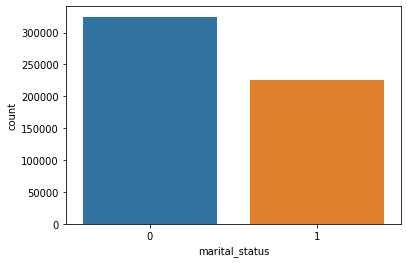

In [17]:
print_dist("marital_status")

### <font color="green">Observations:

* Assuming **0 to be unmarried and 1 to be married**
* Singles shopped more.

product_category_1 Distribution
-------------------------------
Value	Count	Percentage
5	150933	0.27
1	140378	0.26
8	113925	0.21
11	24287	0.04
2	23864	0.04
6	20466	0.04
3	20213	0.04
4	11753	0.02
16	9828	0.02
15	6290	0.01
13	5549	0.01
10	5125	0.01
12	3947	0.01
7	3721	0.01
18	3125	0.01
20	2550	0.0
19	1603	0.0
14	1523	0.0
17	578	0.0
9	410	0.0


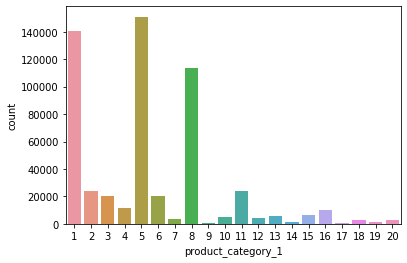

In [18]:
print_dist("product_category_1")

### <font color="green">Observations:

* More than **70% purchase products 5, 1, 8 in product_category_1**

product_category_2 Distribution
-------------------------------
Value	Count	Percentage
8.0	64088	0.17
14.0	55108	0.15
2.0	49217	0.13
16.0	43255	0.11
15.0	37855	0.1
5.0	26235	0.07
4.0	25677	0.07
6.0	16466	0.04
11.0	14134	0.04
17.0	13320	0.04
13.0	10531	0.03
9.0	5693	0.02
12.0	5528	0.01
10.0	3043	0.01
3.0	2884	0.01
18.0	2770	0.01
7.0	626	0.0


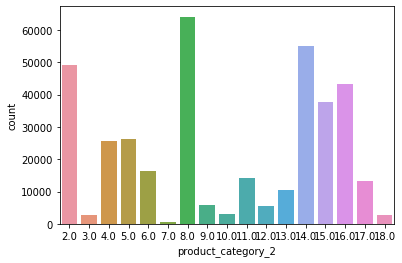

In [19]:
print_dist("product_category_2")

### <font color="green">Observations:

* Here, items 8, 14, 2 show a uptick in the purchase amount.

product_category_3 Distribution
-------------------------------
Value	Count	Percentage
16.0	32636	0.2
15.0	28013	0.17
14.0	18428	0.11
17.0	16702	0.1
5.0	16658	0.1
8.0	12562	0.08
9.0	11579	0.07
12.0	9246	0.06
13.0	5459	0.03
6.0	4890	0.03
18.0	4629	0.03
4.0	1875	0.01
11.0	1805	0.01
10.0	1726	0.01
3.0	613	0.0


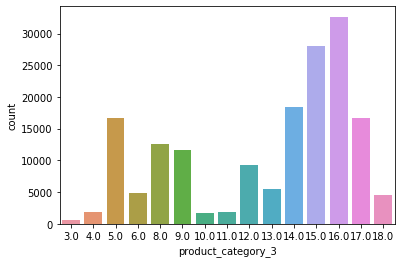

In [20]:
print_dist("product_category_3")

### <font color="green">Observations:

* Here, we have 16, 14 in most buying list.

### As we have some clear trend using individual variables -- let's try to peform some bivariate analysis

In [21]:
occupation_pivot = data.pivot_table(index='occupation', values="purchase", aggfunc=np.sum)
occupation_pivot

,purchase
occupation,
0,635406958
1,424614144
2,238028583
3,162002168
4,666244484
5,113649759
6,188416784
7,557371587
8,14737388


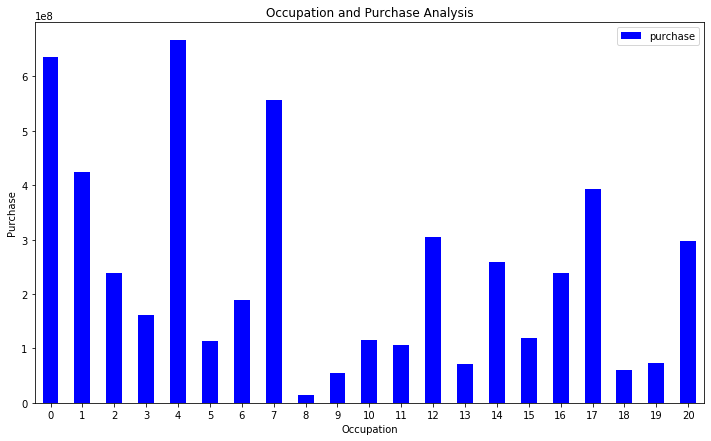

In [22]:
occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

## <font color="firebrick">2. Perform data wrangling / pre-processing 

In [23]:
train_data = pd.read_csv("CustPurchTrain.csv")
test_data = pd.read_csv("CustPurchTest.csv")

train_data.columns = [x.lower() for x in train_data.columns]
test_data.columns = [x.lower() for x in test_data.columns]

display(train_data.head())
display(test_data.head())

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,nan,nan,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.00,14.00,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,nan,nan,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.00,nan,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,nan,nan,7969


,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.00,nan
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.00,nan
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.00,nan
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.00,nan
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.00,12.00


In [24]:
print("Null values in train data")
display(train_data.isnull().sum())
display(train_data.isnull().mean())
print("-"*100)
print("Null values in test data")
display(test_data.isnull().sum())
display(test_data.isnull().mean())

Null values in train data


user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            173638
product_category_3            383247
purchase                           0
dtype: int64

user_id                      0.00
product_id                   0.00
gender                       0.00
age                          0.00
occupation                   0.00
city_category                0.00
stay_in_current_city_years   0.00
marital_status               0.00
product_category_1           0.00
product_category_2           0.32
product_category_3           0.70
purchase                     0.00
dtype: float64

----------------------------------------------------------------------------------------------------
Null values in test data


user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2             72344
product_category_3            162562
dtype: int64

user_id                      0.00
product_id                   0.00
gender                       0.00
age                          0.00
occupation                   0.00
city_category                0.00
stay_in_current_city_years   0.00
marital_status               0.00
product_category_1           0.00
product_category_2           0.31
product_category_3           0.70
dtype: float64

### <font color="green">Observations:

* Product_category_2 is missing around 31% in both the train and test set.
* Product_category_3 is missing around 70% in both the train and test set.

### <font color="green">Steps:
* Impute missing values by -1 in both training and test sets.

In [25]:
train_data["product_category_2"] = train_data["product_category_2"].fillna(-1)
test_data["product_category_2"] = test_data["product_category_2"].fillna(-1)

train_data["product_category_3"] = train_data["product_category_3"].fillna(-1)
test_data["product_category_3"] = test_data["product_category_3"].fillna(-1)

In [26]:
print("Null values in train data after removal")
display(train_data.isnull().sum())
display(train_data.isnull().mean())
print("-"*100)
print("Null values in test data after removal")
display(test_data.isnull().sum())
display(test_data.isnull().mean())

Null values in train data after removal


user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

user_id                      0.00
product_id                   0.00
gender                       0.00
age                          0.00
occupation                   0.00
city_category                0.00
stay_in_current_city_years   0.00
marital_status               0.00
product_category_1           0.00
product_category_2           0.00
product_category_3           0.00
purchase                     0.00
dtype: float64

----------------------------------------------------------------------------------------------------
Null values in test data after removal


user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
dtype: int64

user_id                      0.00
product_id                   0.00
gender                       0.00
age                          0.00
occupation                   0.00
city_category                0.00
stay_in_current_city_years   0.00
marital_status               0.00
product_category_1           0.00
product_category_2           0.00
product_category_3           0.00
dtype: float64

## <font color="firebrick">3. Feature Engineering

### Applying  encoding techniques

In [27]:
print("In training data")
display(train_data["gender"].value_counts())
print("In test data")
display(test_data["gender"].value_counts())

In training data


M    414259
F    135809
Name: gender, dtype: int64

In test data


M    175772
F     57827
Name: gender, dtype: int64

In [28]:
# converting gender as binary variable.
gender_dict = {
    "F" : 0,
    "M" : 1
}

train_data["gender"] = train_data["gender"].map(gender_dict)
test_data["gender"] = test_data["gender"].map(gender_dict)

print("In training data after binarisation")
display(train_data["gender"].value_counts())
print("In test data after binarisation")
display(test_data["gender"].value_counts())

In training data after binarisation


1    414259
0    135809
Name: gender, dtype: int64

In test data after binarisation


1    175772
0     57827
Name: gender, dtype: int64

In [29]:
print("In training data")
display(train_data["age"].value_counts())
print("In test data")
display(test_data["age"].value_counts())

In training data


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: age, dtype: int64

In test data


26-35    93428
36-45    46711
18-25    42293
46-50    19577
51-55    16283
55+       9075
0-17      6232
Name: age, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

# let's label encode the age category

label_encoder = LabelEncoder()
label_encoder.fit(train_data["age"])

train_data["age"] = label_encoder.transform(train_data["age"])
test_data["age"] = label_encoder.transform(test_data["age"])

In [31]:
print("In training data after encoding")
display(train_data["age"].value_counts())
print("In test data after encoding")
display(test_data["age"].value_counts())

In training data after encoding


2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: age, dtype: int64

In test data after encoding


2    93428
3    46711
1    42293
4    19577
5    16283
6     9075
0     6232
Name: age, dtype: int64

In [32]:
label_encoder = LabelEncoder()
label_encoder.fit(train_data["city_category"])

train_data["city_category"] = label_encoder.transform(train_data["city_category"])
test_data["city_category"] = label_encoder.transform(test_data["city_category"])

In [33]:
label_encoder = LabelEncoder()
label_encoder.fit(pd.concat([train_data["product_id"].astype(str), test_data["product_id"].astype(str)], axis=0, sort=False))

train_data["product_id"] = label_encoder.transform(train_data["product_id"].astype(str))
test_data["product_id"] = label_encoder.transform(test_data["product_id"].astype(str))

In [34]:
label_encoder = LabelEncoder()
label_encoder.fit(train_data["stay_in_current_city_years"])

train_data["stay_in_current_city_years"] = label_encoder.transform(train_data["stay_in_current_city_years"])
test_data["stay_in_current_city_years"] = label_encoder.transform(test_data["stay_in_current_city_years"])

In [35]:
print("After feature engineering..")
display(train_data.head())
display(test_data.head())

After feature engineering..


,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,684,0,0,10,0,2,0,3,-1.00,-1.00,8370
1,1000001,2406,0,0,10,0,2,0,1,6.00,14.00,15200
2,1000001,868,0,0,10,0,2,0,12,-1.00,-1.00,1422
3,1000001,844,0,0,10,0,2,0,12,14.00,-1.00,1057
4,1000002,2769,1,6,16,2,4,0,8,-1.00,-1.00,7969


,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3
0,1000004,1216,1,4,7,1,2,1,1,11.00,-1.00
1,1000009,1063,1,2,17,2,0,0,3,5.00,-1.00
2,1000010,2799,0,3,1,1,4,1,5,14.00,-1.00
3,1000010,1379,0,3,1,1,4,1,4,9.00,-1.00
4,1000011,535,0,2,1,2,1,0,4,5.00,12.00


### Function to create count features

In [36]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [37]:
#applying to train data
train_data['age_count'] = getCountVar(train_data, train_data, 'age')
train_data['occupation_count'] =getCountVar(train_data, train_data, 'occupation')
train_data['product_category_1_count'] =getCountVar(train_data, train_data,'product_category_1')
train_data['product_category_2_count'] =getCountVar(train_data, train_data, 'product_category_2')
train_data['product_category_3_count'] =getCountVar(train_data, train_data,'product_category_3')
train_data['product_id_count'] = getCountVar(train_data, train_data, 'product_id')
                                                    
#applying to test data
test_data['age_count'] = getCountVar(test_data, test_data, 'age')
test_data['occupation_count'] =getCountVar(test_data, test_data, 'occupation')
test_data['product_category_1_count'] =getCountVar(test_data, test_data,'product_category_1')
test_data['product_category_2_count'] =getCountVar(test_data, test_data, 'product_category_2')
test_data['product_category_3_count'] =getCountVar(test_data, test_data,'product_category_3')
test_data['product_id_count'] = getCountVar(test_data, test_data, 'product_id')                                                  

## <font color="firebrick"> 4 .Feature selection

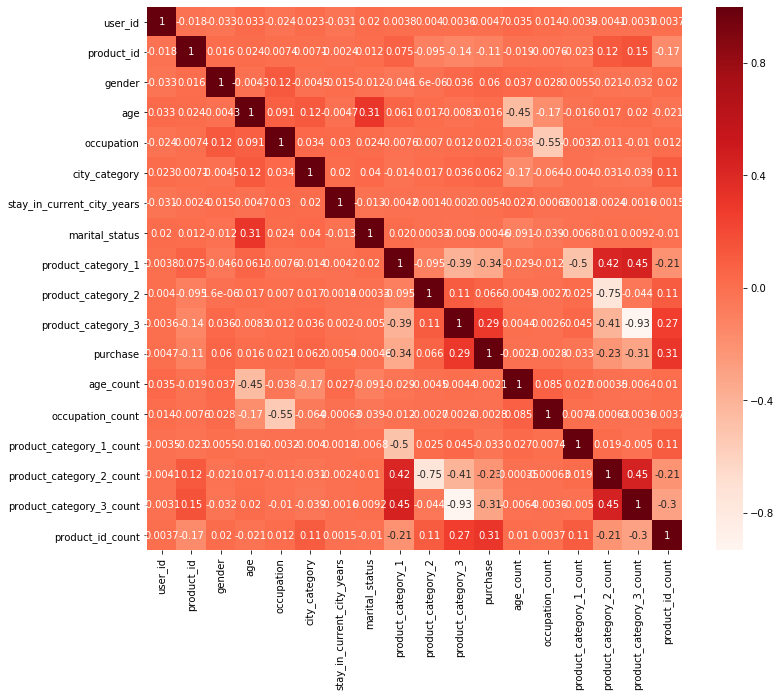

In [38]:
#1.Filter Method : Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_data.corr()
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [39]:
#Correlation with output variable
cor_target = abs(cor["purchase"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

purchase   1.00
Name: purchase, dtype: float64

### <font color="green">Observations:
- We can observe the trend that only product category 1 and product category 2 are negatively correlated to purchase.
- All the other independent features are neither strongly correlated to each other or the target. 
- There is no feature which is highly correlated to target variable or to other features.


In [40]:
#2.Wrapper Method : Backward Elimination
import statsmodels.api as sm

#Adding constant column of ones, mandatory for sm.OLS model
X = train_data.drop("purchase",1)       #Feature Matrix
y = train_data["purchase"]              #Target Variable



X_1 = sm.tools.tools.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1.astype(float)).fit()
model.pvalues

C:\Users\I518759\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                        0.30
user_id                      0.02
product_id                   0.00
gender                       0.00
age                          0.00
occupation                   0.00
city_category                0.00
stay_in_current_city_years   0.05
marital_status               0.00
product_category_1           0.00
product_category_2           0.00
product_category_3           0.00
age_count                    0.00
occupation_count             0.01
product_category_1_count     0.00
product_category_2_count     0.00
product_category_3_count     0.00
product_id_count             0.00
dtype: float64

In [41]:
#Backward Elimination
#remove variable with pvalue  greater than 0.05.
#Hence we will remove this feature and build the model once again. 
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
selected_features_BE

['user_id',
 'product_id',
 'gender',
 'age',
 'occupation',
 'city_category',
 'marital_status',
 'product_category_1',
 'product_category_2',
 'product_category_3',
 'age_count',
 'occupation_count',
 'product_category_1_count',
 'product_category_2_count',
 'product_category_3_count',
 'product_id_count']

### <font color="green">Observations :
- As we can see that the variables have p value equal or less than 0.05 .
- Hence we will not remove the features.
  

## <font color="firebrick">5 . Modeling – Linear regression and Decision Tree

In [42]:
#Define target and ID columns:
target = 'purchase'
IDcol = ['user_id','product_id']

#for performing cross validations
from sklearn.model_selection  import cross_val_score
from sklearn import metrics

#function to fit the model , perform cv and test metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("\nOn Train Data :")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    

In [44]:
# Linear Regression :
from sklearn.linear_model import LinearRegression

predictors = train_data.columns.drop(['purchase','product_id','user_id'])
LR = LinearRegression(normalize=True)
modelfit(LR, train_data, test_data, predictors, target, IDcol)


Model Report

On Train Data :
RMSE : 4350
CV Score : Mean - 4358 | Std - 66.05 | Min - 4290 | Max - 4622


In [46]:
#Decision Tree :
predictors = train_data.columns.drop(['purchase','product_id','user_id'])
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_data, test_data, predictors, target, IDcol)

DT


Model Report

On Train Data :
RMSE : 2670
CV Score : Mean - 2769 | Std - 212.8 | Min - 2680 | Max - 3693


DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## <font color="firebrick">6. Plot top features.

<Figure size 432x288 with 0 Axes>

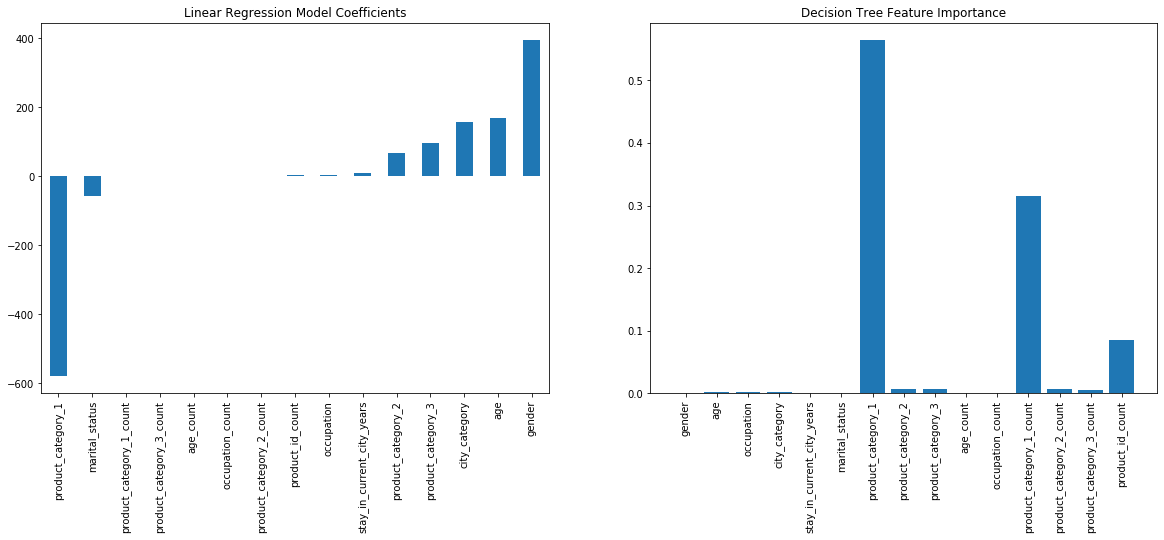

In [47]:
# get importance
fig = plt.figure()
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Linear Regression Model Coefficients')

plt.subplot(2, 2, 2)
importance = DT.feature_importances_
plt.bar(predictors , importance)
plt.title('Decision Tree Feature Importance')
plt.xticks(rotation='vertical')
plt.show()

### <font color="green">The ML algorithm that perform the best was Decision Tree Model with lower RMSE of 2680.

In [63]:
#Saving purchase results for test dataset customer records:
LTresult = LR.predict(test_data[predictors])
DTresult = DT.predict(test_data[predictors])
    
#Export submission file:
submission = pd.DataFrame(np.column_stack([LTresult,DTresult]) , columns = ['LTresult' , 'DTresult'])
submission.columns
submission.to_csv('CustPurchTestResult.csv', index=False)

In [62]:
submission.head()

,LTresult,DTresult
0,12085.81,15694.10
1,11032.51,2044.25
2,8408.59,4560.44
3,9848.73,13341.49
4,11556.86,17119.21
